In [1]:
# Install TensorFlow
# !pip install -q tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0


In [2]:
a = (1, 2, 3)
a[0] = 5

TypeError: ignored

In [3]:
a = [1, 2, 3]
a[0]
a

[1, 2, 3]

In [4]:
a = tf.Variable(5.)
b = tf.Variable(3.)
print(a * b)

tf.Tensor(15.0, shape=(), dtype=float32)


In [5]:
a.assign(a + 1) # or a = a + 1
a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=6.0>

In [6]:
c = tf.constant(4.)
print(a * b  + c)

tf.Tensor(22.0, shape=(), dtype=float32)


# Calculate Gradient Descent with Tensorflow

In [0]:
# L(w) = w**2

w = tf.Variable(5.)

def get_loss(w):
  return w ** 2

def get_grad(w):
  with tf.GradientTape() as tape:
    L = get_loss(w)
  g = tape.gradient(L, w) # tape of gradient with respect to w (w could also be a list of variables)
  return g

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

losses = []

for i in range(50):
  g = get_grad(w)
  optimizer.apply_gradients(zip([g], [w])) # grads = [g1, g2, g3], params = [w1, w2, w3]
  losses.append(get_loss(w))

Final loss: 5.0925916816879635e-09


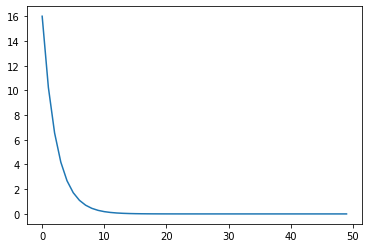

In [11]:
import matplotlib.pyplot as plt
plt.plot(losses)
print(f"Final loss: {get_loss(w)}")

# Calculate Gradient Descent Manually

In [0]:
w = tf.Variable(5.)
losses2 = []
learning_rate = 0.1
for i in range(50):
  grad = 2 * w
  w.assign(w - learning_rate * grad)
  losses2.append(w ** 2)

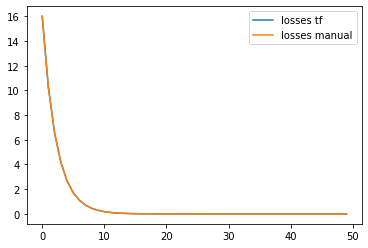

In [15]:
plt.plot(losses, label="losses tf")
plt.plot(losses2, label="losses manual")
plt.legend()